# Necessary Imports and Installations

In [ ]:
!pip install skrebate

In [ ]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Datasets/diabetic_data.csv"
dataset = pd.read_csv(path)
df=dataset.copy()

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype !='O']

# Exploratory Data Analysis

In [ ]:
dataset1=dataset.copy()

dataset1['readmitted'] = dataset1['readmitted'].replace(['<30'], 'YES')
dataset1=dataset1[dataset1['readmitted']!='>30']

In [ ]:
df=dataset1
dfn = df.drop(df[df['readmitted'] != 'NO'].index)
dfy=df.drop(df[df['readmitted'] == 'NO'].index)

In [ ]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['number_outpatient'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
0     56988
1      4833
2      1928
3      1120
4       619
5       290
6       149
7        72
8        58
9        45
10       22
11       18
13       17
12       15
14       11
16        7
15        6
17        5
20        3
21        3
24        2
26        1
23        1
25        1
22        1
35        1
36        1
29        1
19        1
18        1
40        1
Name: number_outpatient, dtype: int64


In [ ]:
df1=dataset1[numerical_features]
df2=df1.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
l=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [ ]:
col_nd=['num_medications','num_lab_procedures','time_in_hospital']

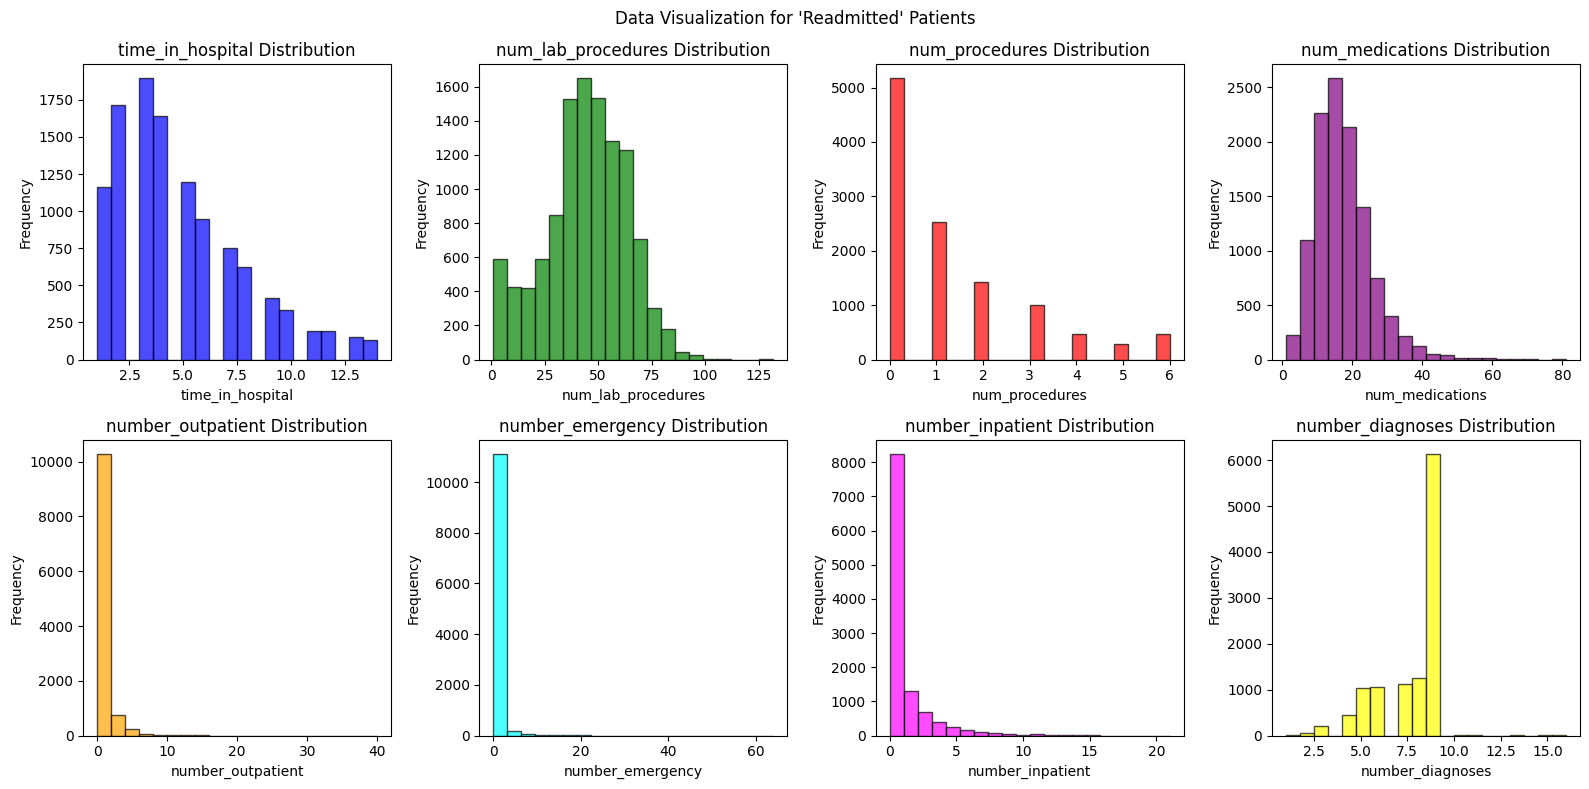

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        ax.hist(dfy[l[i]], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        ax.set_title(f'{l[i]} Distribution')
        ax.set_xlabel(l[i])
        ax.set_ylabel('Frequency')

fig.suptitle("Data Visualization for 'Readmitted' Patients")
plt.tight_layout()
plt.show()


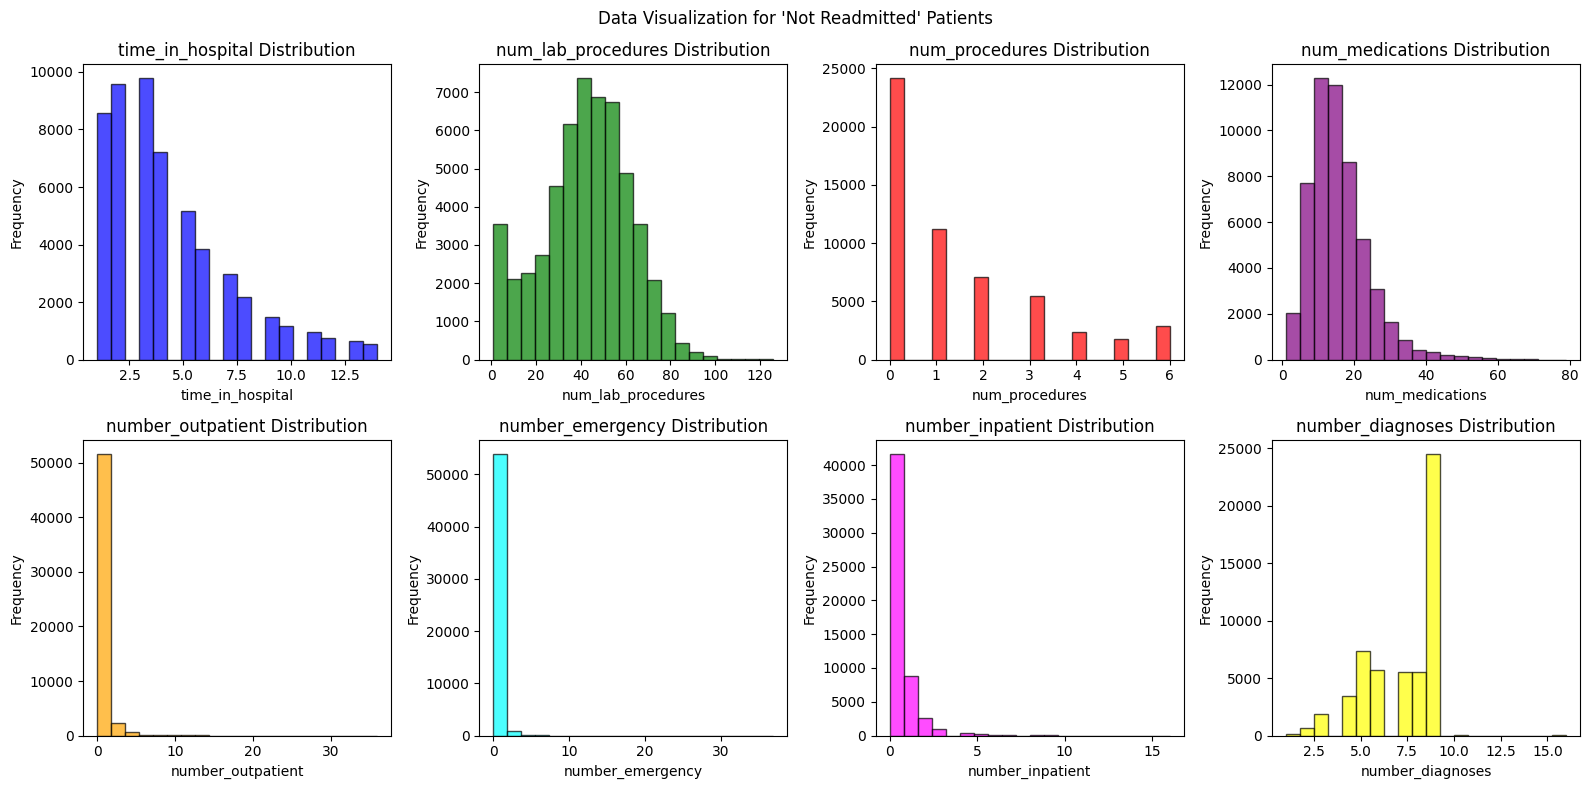

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        ax.hist(dfn[l[i]], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        ax.set_title(f'{l[i]} Distribution')
        ax.set_xlabel(l[i])
        ax.set_ylabel('Frequency')

fig.suptitle("Data Visualization for 'Not Readmitted' Patients")
plt.tight_layout()
plt.show()


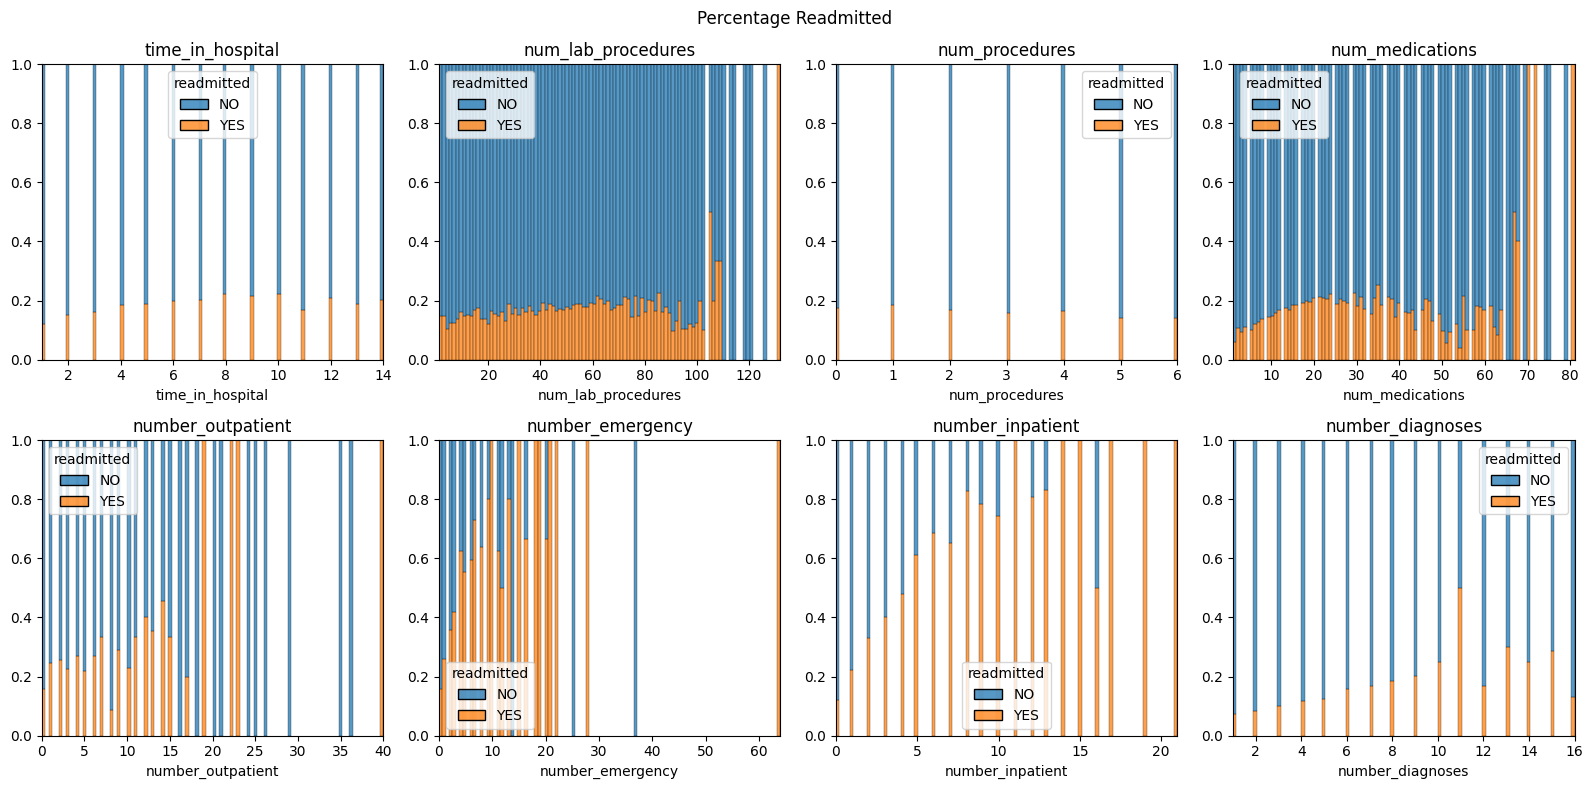

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
  sns.histplot(data=df, x=l[i], hue='readmitted', multiple='fill', bins=100, ax=ax)  # Adjust bins as needed
  ax.set_xlabel(l[i])
  ax.set_ylabel('')
  ax.set_title('{}'.format(l[i]))
fig.suptitle("Percentage Readmitted")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def remove_outliers(df, columns):
    """
    Remove rows containing outliers in any of the specified columns.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        columns (list): List of column names to check for outliers.

    Returns:
        DataFrame: DataFrame with outlier rows removed.
    """
    # Define a function to detect outliers using IQR method
    def detect_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (series < lower_bound) | (series > upper_bound)

    # Initialize a mask of False for all rows
    mask = pd.Series(False, index=df.index)

    # Iterate over specified columns
    for col in columns:
        # Apply outlier detection function to each column and combine the results using OR operation
        mask |= detect_outliers(df[col])

    # Return the DataFrame with rows containing outliers removed
    return df[~mask].reset_index(drop=True)  # Reset index to remove gaps in index caused by removed rows

# Example usage:
# Assuming df is your DataFrame and l is your list of numerical columns
# df = pd.DataFrame(...)
# l = ['column1', 'column2', ...]

# df_cleaned = remove_outliers(df, l)



In [ ]:
df.shape

(66221, 50)

In [ ]:
lbp=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']

In [ ]:
df10= remove_outliers(df, lbp)
df10n = df10.drop(df10[df10['readmitted'] != 'NO'].index)
df10y=df10.drop(df10[df10['readmitted'] == 'NO'].index)

In [ ]:
df10.shape

(60243, 50)

In [ ]:
print(l)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [ ]:
df[["number_outpatient", "number_emergency"]]

,number_outpatient,number_emergency
0,0,0
2,2,0
3,0,0
4,0,0
6,0,0
...,...,...
101759,3,0
101762,0,0
101763,1,0
101764,0,0


In [ ]:
df10[["number_outpatient", "number_emergency"]]

,number_outpatient,number_emergency
0,2,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
60238,3,0
60239,0,0
60240,1,0
60241,0,0


In [ ]:
print(l)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


<ipython-input-122-f74f0773b905>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')  # You can choose any colormap you prefer


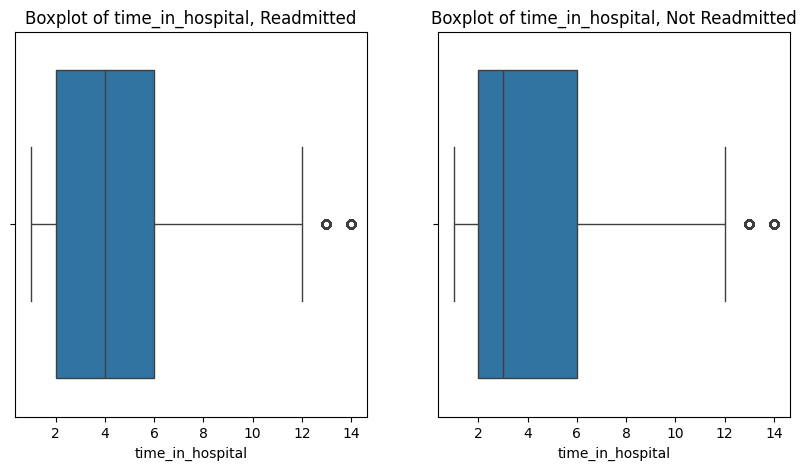

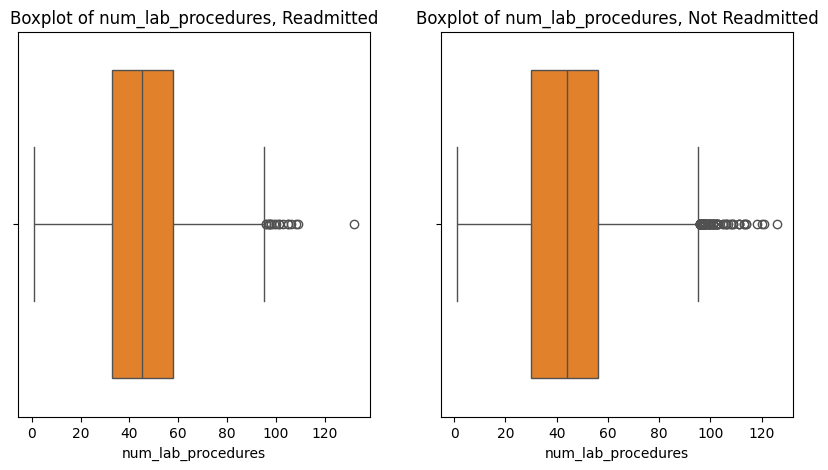

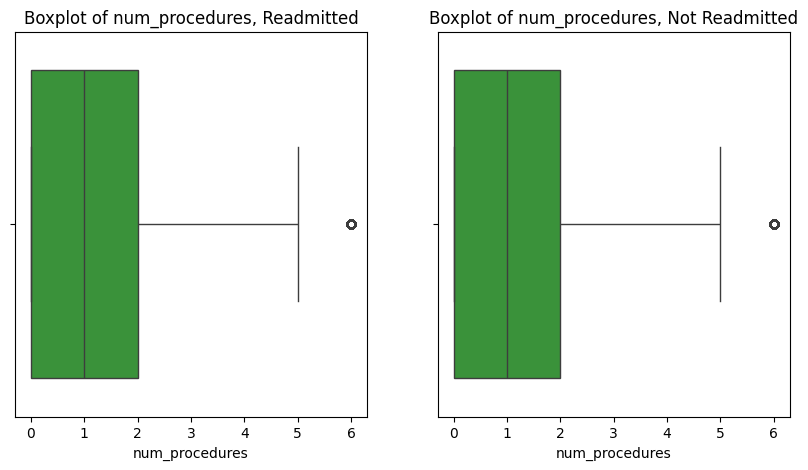

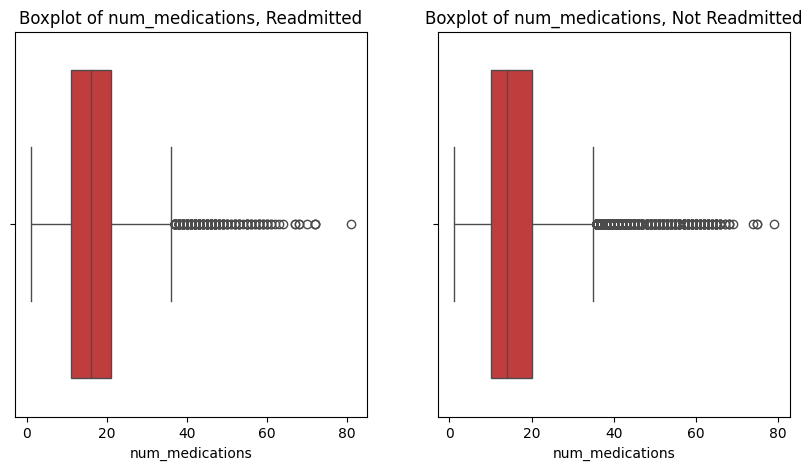

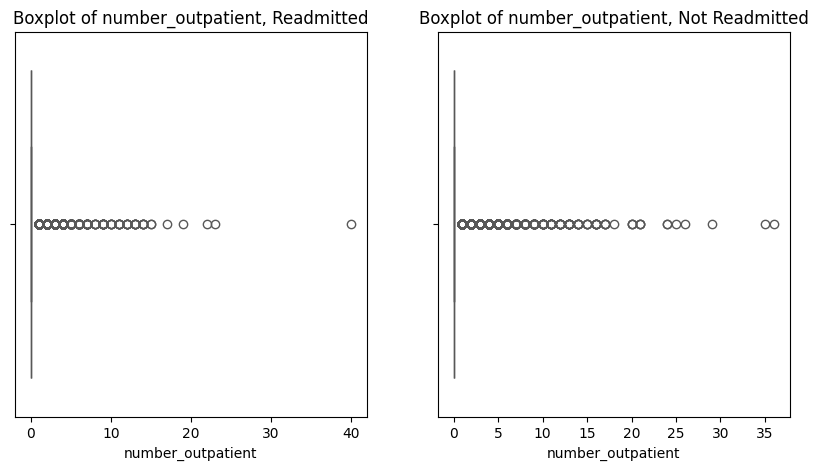

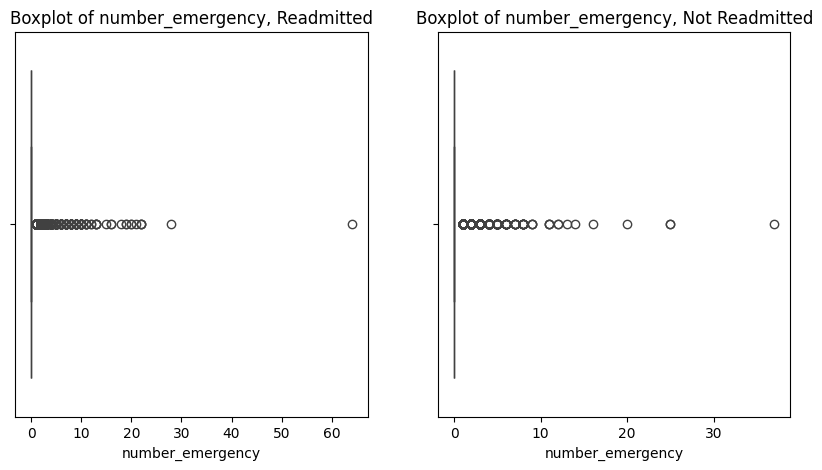

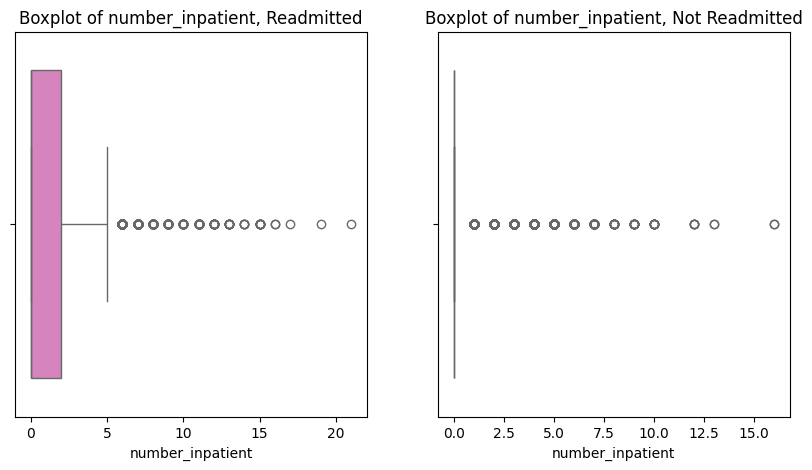

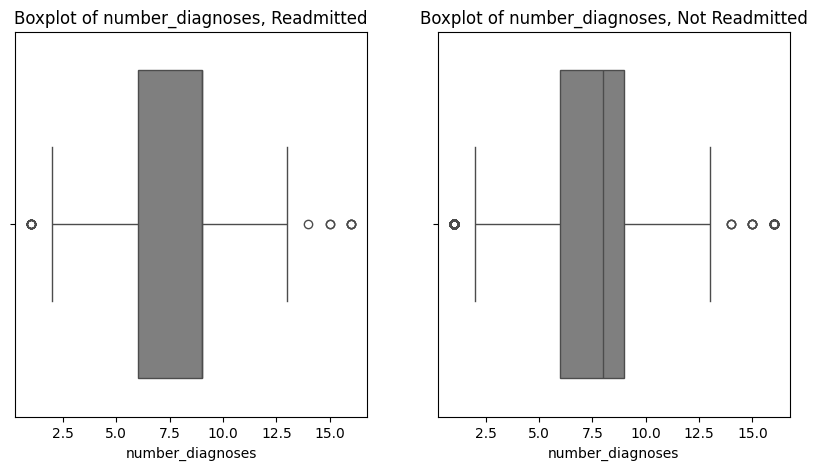

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# Assuming lbp and df10y, df10n are defined earlier

# Define a colormap
cmap = get_cmap('tab10')  # You can choose any colormap you prefer

# Generate colors dynamically based on the number of features in lbp
colors = [cmap(i) for i in range(len(l))]

for i, feature in enumerate(l):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(x=dfy[feature], ax=axes[0], color=colors[i])
    axes[0].set_title(f'Boxplot of {feature}, Readmitted')

    sns.boxplot(x=dfn[feature], ax=axes[1], color=colors[i])
    axes[1].set_title(f'Boxplot of {feature}, Not Readmitted')

plt.show()

<ipython-input-123-287c184e50e7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')  # You can choose any colormap you prefer


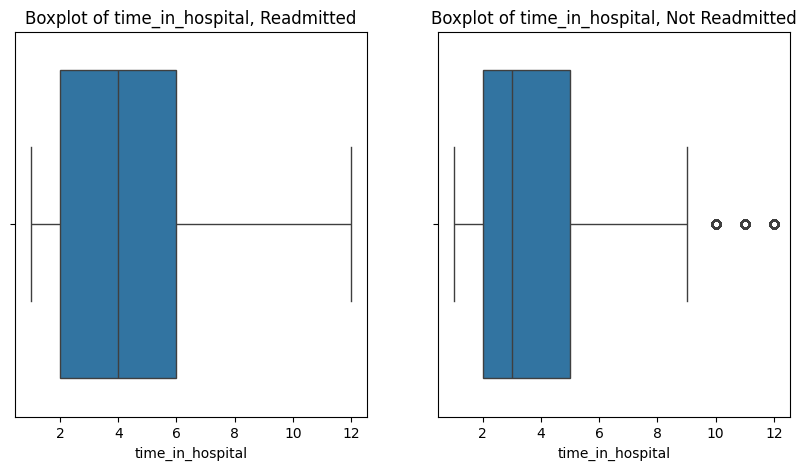

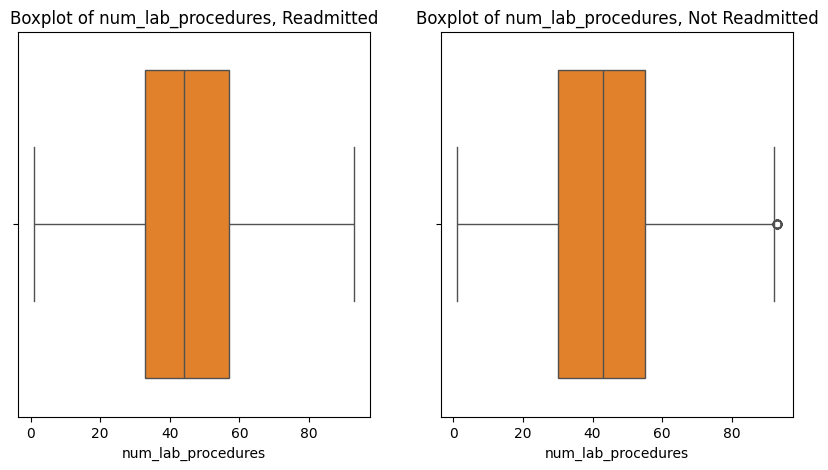

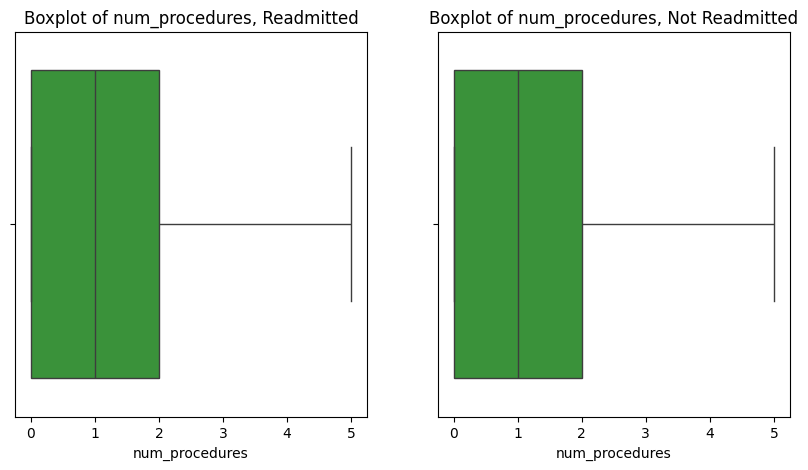

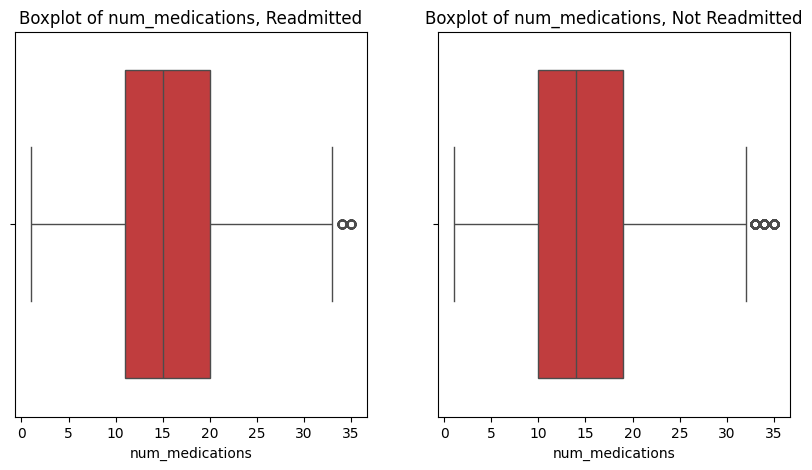

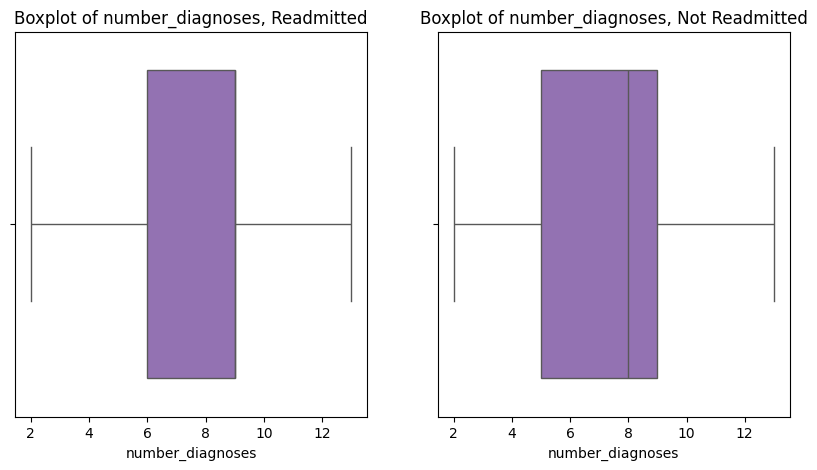

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# Assuming lbp and df10y, df10n are defined earlier

# Define a colormap
cmap = get_cmap('tab10')  # You can choose any colormap you prefer

# Generate colors dynamically based on the number of features in lbp
colors = [cmap(i) for i in range(len(lbp))]

for i, feature in enumerate(lbp):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(x=df10y[feature], ax=axes[0], color=colors[i])
    axes[0].set_title(f'Boxplot of {feature}, Readmitted')

    sns.boxplot(x=df10n[feature], ax=axes[1], color=colors[i])
    axes[1].set_title(f'Boxplot of {feature}, Not Readmitted')

plt.show()


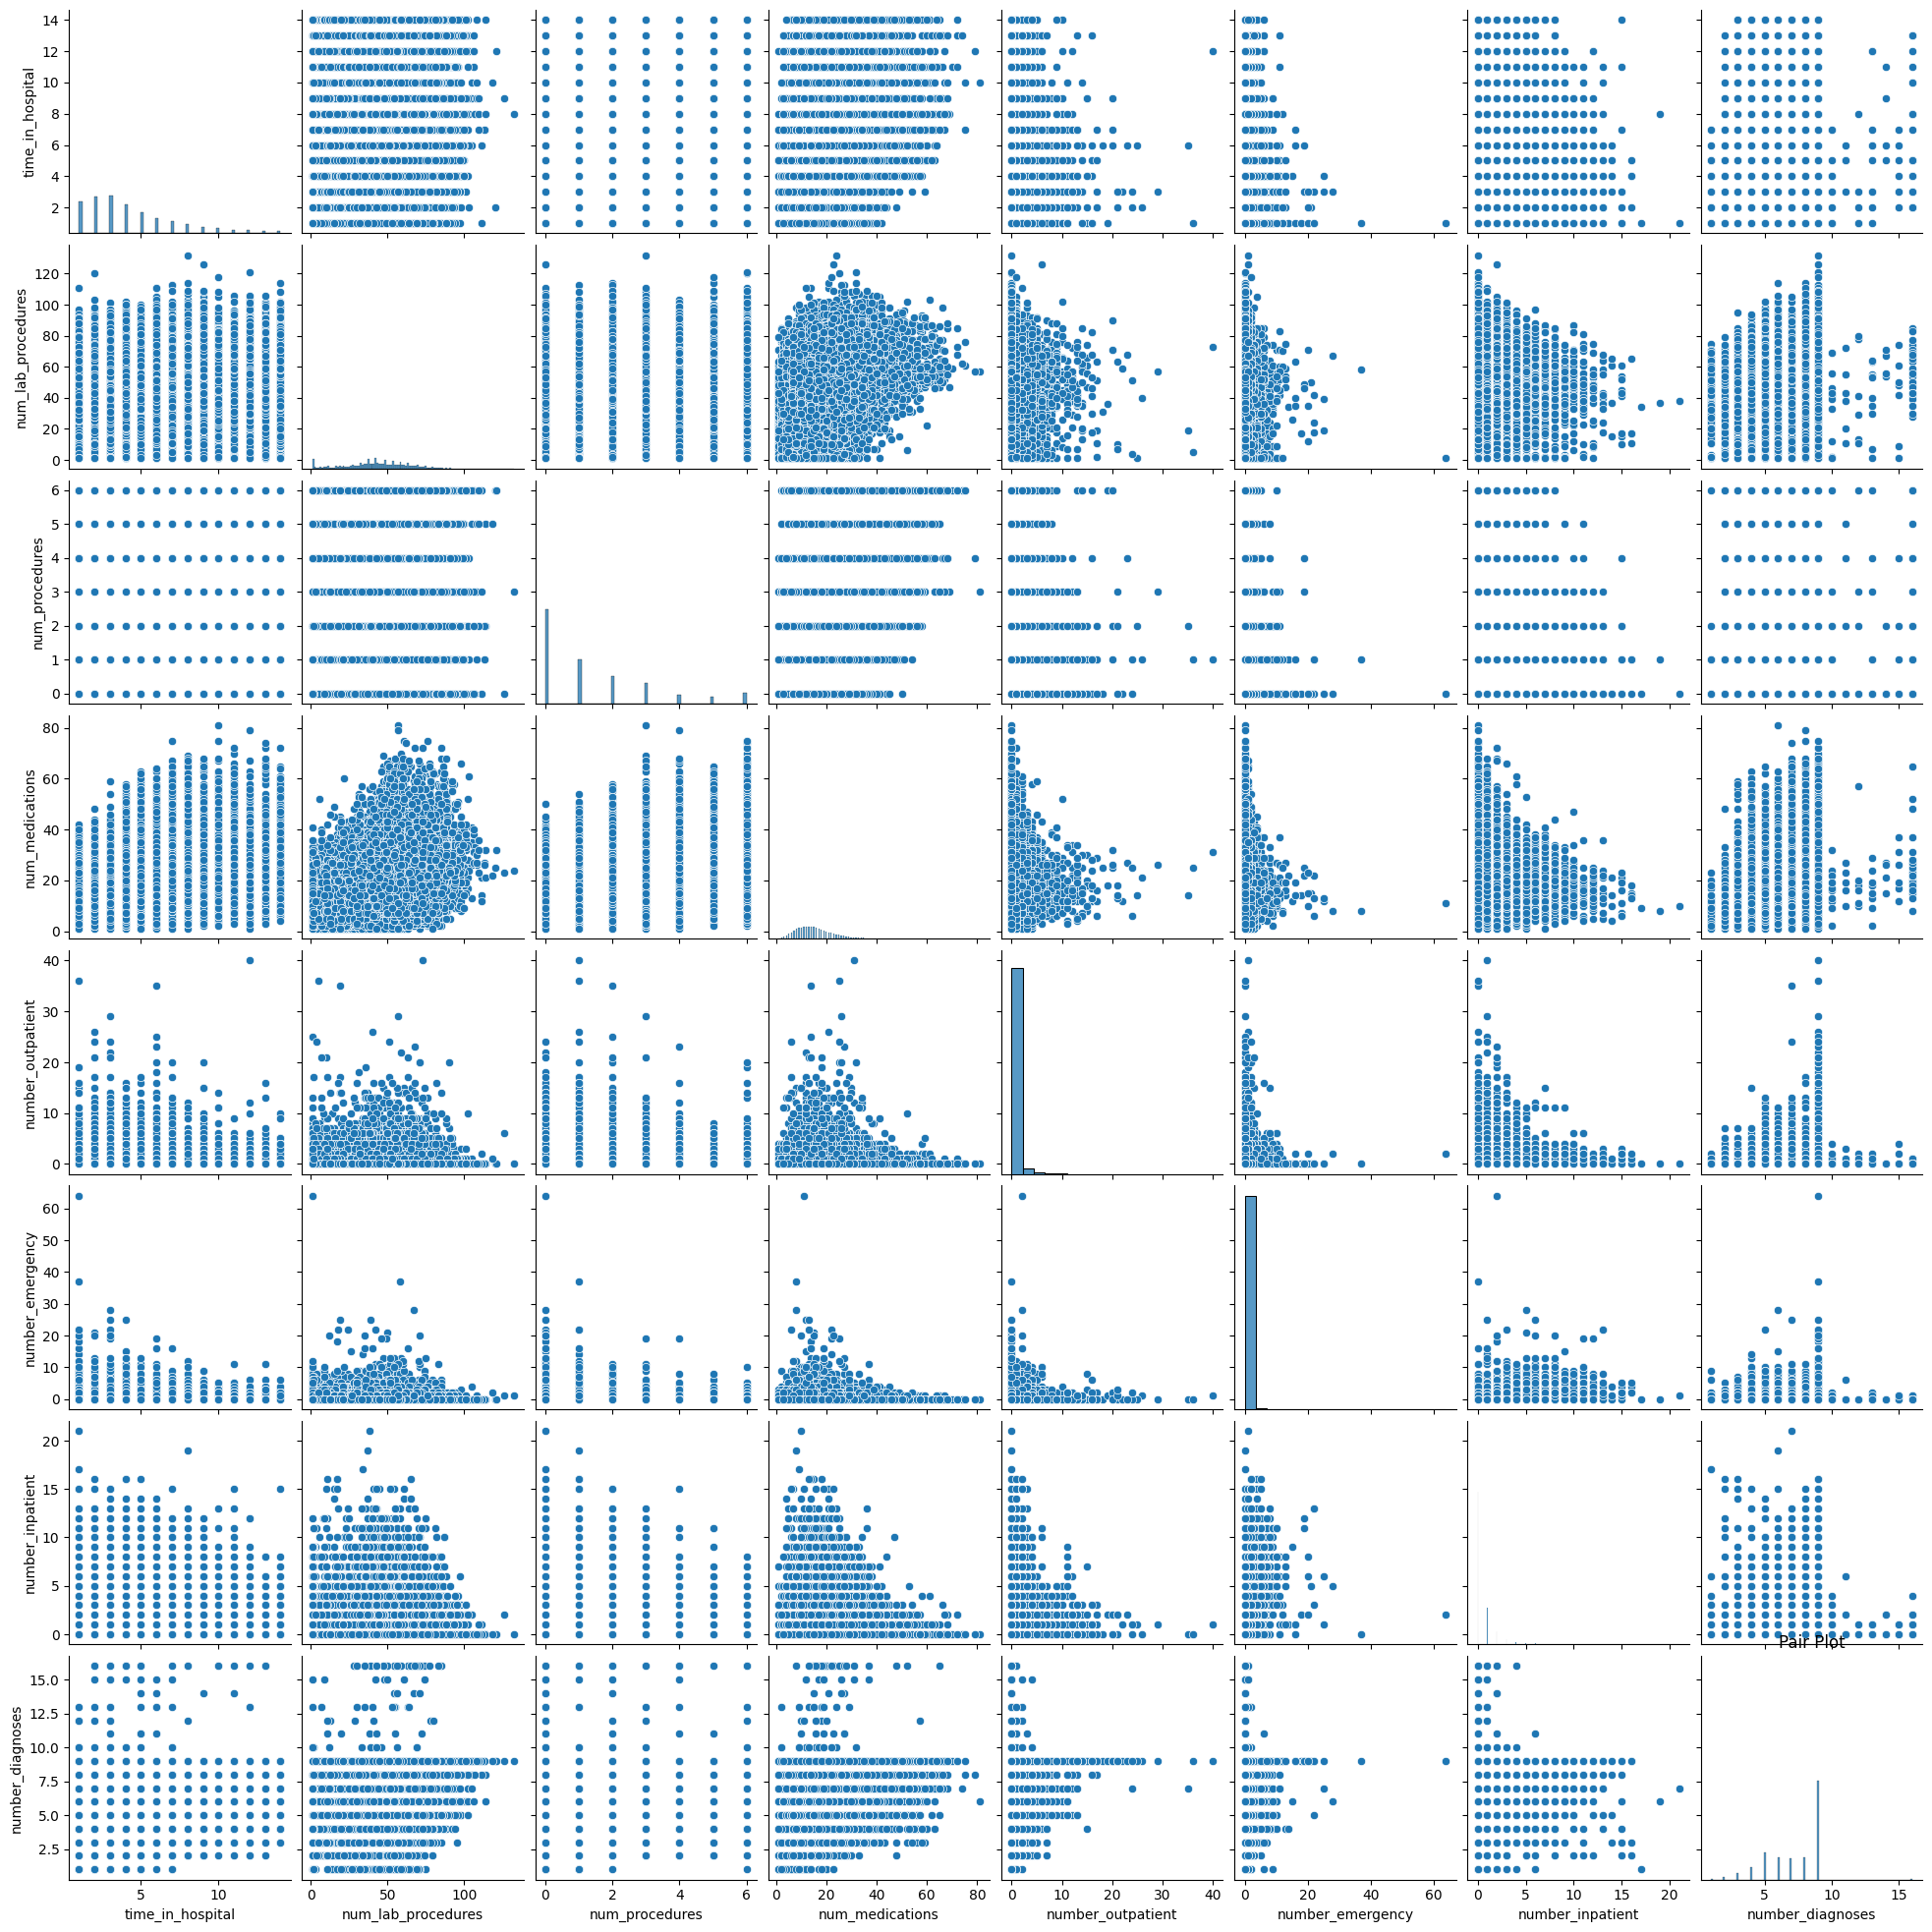

In [ ]:
sns.pairplot(df2)
plt.title('Pair Plot')
plt.show()

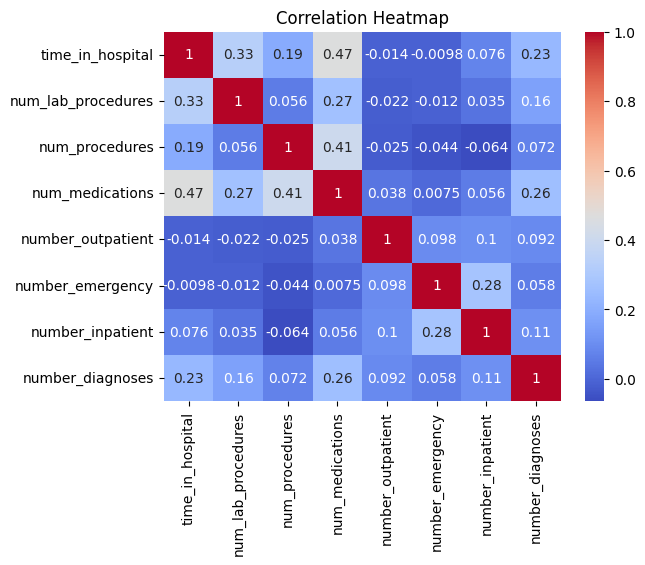

In [ ]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

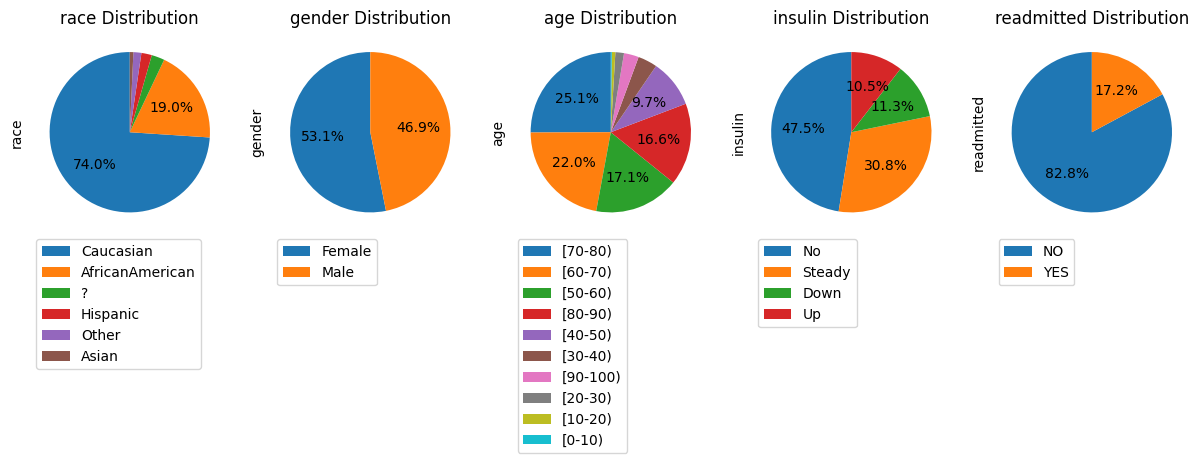

In [ ]:
from math import ceil
lc1=["race", "gender", "age", "insulin", "readmitted"]

# Assuming df is your DataFrame

# Get the number of unique categorical columns
num_cols = len(lc1)

# Define the number of columns in the plot
num_columns_in_plot = 5

# Calculate the number of rows needed
num_rows = ceil(num_cols / num_columns_in_plot)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns_in_plot, figsize=(15,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for i, column in enumerate(lc1):
    # Get the top 5 most recurring values
    value_counts = df[column].value_counts()
    values_to_plot = value_counts[value_counts / len(df) >= 0.001]
    # Plot the pie chart without labels alongside the pieces
    pie = values_to_plot.plot.pie(autopct=lambda p: f'{p:.1f}%' if p > 5 else '', startangle=90, ax=axes[i], labels=None)

    # Display legend outside the pie chart with adjusted bbox_to_anchor
    pie.legend(labels=values_to_plot.index, loc='upper left',bbox_to_anchor=(0, 0) )

    axes[i].set_title(f'{column} Distribution')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


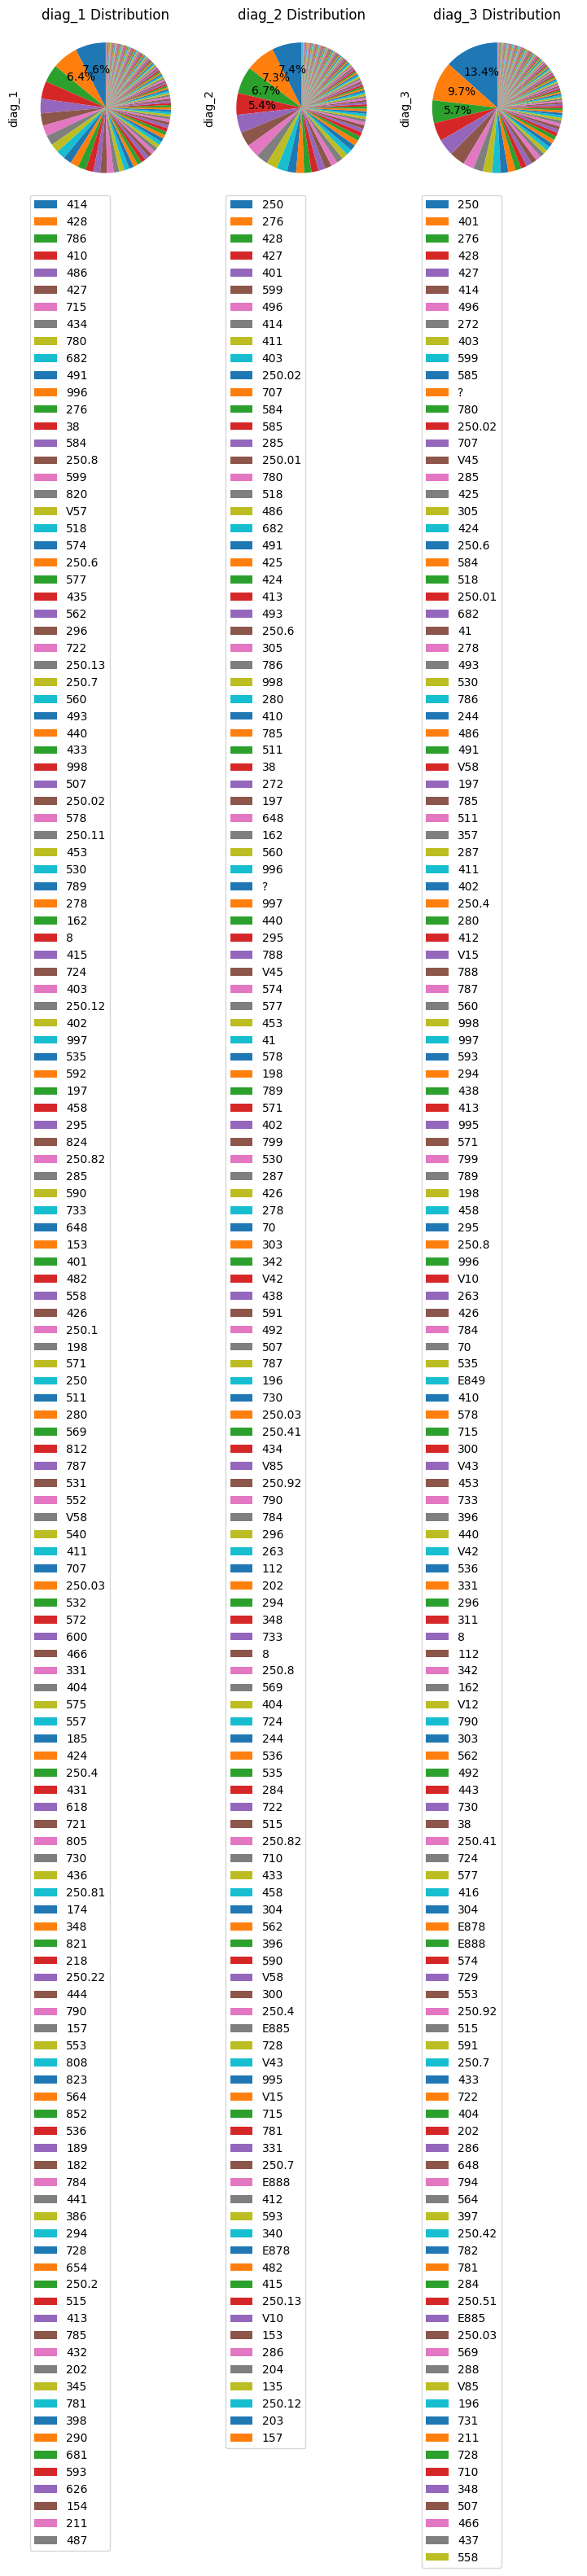

In [ ]:
lc2=["diag_1", "diag_2", "diag_3"]

# Assuming df is your DataFrame

# Get the number of unique categorical columns
num_cols = len(lc2)

# Define the number of columns in the plot
num_columns_in_plot = 5

# Calculate the number of rows needed
num_rows = ceil(num_cols / num_columns_in_plot)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns_in_plot, figsize=(15,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for i, column in enumerate(lc2):
    # Get the top 5 most recurring values
    value_counts = df[column].value_counts()
    values_to_plot = value_counts[value_counts / len(df) >= 0.001]
    # Plot the pie chart without labels alongside the pieces
    pie = values_to_plot.plot.pie(autopct=lambda p: f'{p:.1f}%' if p > 5 else '', startangle=90, ax=axes[i], labels=None)

    # Display legend outside the pie chart with adjusted bbox_to_anchor
    pie.legend(labels=values_to_plot.index, loc='upper left',bbox_to_anchor=(0, 0) )

    axes[i].set_title(f'{column} Distribution')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [ ]:
df=df10.copy()

# Preprocessing

## Removing Unnecessay Rows

In [ ]:
df = df[df['readmitted'] != '>30']

In [ ]:
df.shape

(60243, 50)

## Handling missing value

In [ ]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace "?" with NaN
df.replace("?", pd.NA, inplace=True)

# If "?" is recognized as a missing value without needing replacement, you can simply use the following:
# df.replace("?", inplace=True)

# Display the DataFrame after replacement
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
1,500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,55842,84259809,Caucasian,Male,[60-70),<NA>,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,15738,63555939,Caucasian,Female,[90-100),<NA>,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Filter columns where the percentage of null values is greater than 0
null_percentage = null_percentage[null_percentage > 0]

# Print the percentage of null values for each column
for column, percentage in null_percentage.items():
    print(f"Column '{column}' has {percentage:.2f}% null values.")



Column 'race' has 2.59% null values.
Column 'weight' has 97.48% null values.
Column 'payer_code' has 39.33% null values.
Column 'medical_specialty' has 47.97% null values.
Column 'diag_1' has 0.03% null values.
Column 'diag_2' has 0.17% null values.
Column 'diag_3' has 1.49% null values.


In [ ]:
import pandas as pd

# Assuming cols_to_replace is a list of column names where you want to replace null values
cols_to_replace = ['weight', 'payer_code', 'medical_specialty','race']

# Calculate mode for each column
modes = df[cols_to_replace].mode().iloc[0]

# Replace null values with the mode for each column
for col in cols_to_replace:
    df[col].fillna(modes[col], inplace=True)



In [ ]:
# Assuming cols_to_replace is a list of column names where you want to replace NaN values
cols_to_replace = ['diag_1', 'diag_2', 'diag_3', 'max_glu_serum','A1Cresult']
dummy_category = 'dummy'

# Replace NaN values with dummy category for each column
for col in cols_to_replace:
    df[col].fillna(dummy_category, inplace=True)




## Drop Unnecessary Columns

In [ ]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['number_outpatient'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
0     51656
1      4453
2      1804
3      1050
4       582
5       277
6       143
7        69
8        56
9        42
10       21
11       18
12       15
13       15
14       10
15        6
17        5
16        5
21        3
20        2
24        2
35        1
18        1
29        1
36        1
26        1
22        1
25        1
23        1
40        1
Name: number_outpatient, dtype: int64


In [ ]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['readmitted'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)

Counts of different values in the numerical column:
NO     49823
YES    10420
Name: readmitted, dtype: int64


In [ ]:
col_drop=['encounter_id', 'weight','payer_code', 'patient_nbr']
df.drop(columns=col_drop, inplace=True)



## Label Encoding

In [ ]:
for c, i in enumerate(df.columns):
  print(f"{c}. {i}")

0. race
1. gender
2. age
3. admission_type_id
4. discharge_disposition_id
5. admission_source_id
6. time_in_hospital
7. medical_specialty
8. num_lab_procedures
9. num_procedures
10. num_medications
11. number_outpatient
12. number_emergency
13. number_inpatient
14. diag_1
15. diag_2
16. diag_3
17. number_diagnoses
18. max_glu_serum
19. A1Cresult
20. metformin
21. repaglinide
22. nateglinide
23. chlorpropamide
24. glimepiride
25. acetohexamide
26. glipizide
27. glyburide
28. tolbutamide
29. pioglitazone
30. rosiglitazone
31. acarbose
32. miglitol
33. troglitazone
34. tolazamide
35. examide
36. citoglipton
37. insulin
38. glyburide-metformin
39. glipizide-metformin
40. glimepiride-pioglitazone
41. metformin-rosiglitazone
42. metformin-pioglitazone
43. change
44. diabetesMed
45. readmitted


In [ ]:
selected_feat=list(df.columns)
sel_col=selected_feat

In [ ]:
sel_num=[]
sel_cat=[]
for i in sel_col:
  print(i)
  if df[i].dtype!="object":
    sel_num.append(i)
  else:
    sel_cat.append(i)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [ ]:
df=df[sel_col]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Male,[30-40),1,1,7,2,InternalMedicine,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
1,Caucasian,Male,[40-50),1,1,7,1,InternalMedicine,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,Caucasian,Male,[60-70),3,1,2,4,InternalMedicine,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,AfricanAmerican,Male,[60-70),2,1,4,7,InternalMedicine,62,0,...,No,Steady,No,No,No,No,No,Ch,Yes,YES


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in sel_cat:
    x=label_encoder.fit_transform(df[i])
    df=df.drop(i, axis=1)
    df[i]=x

In [ ]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,7,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,0
1,1,1,7,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,0
2,3,1,2,4,70,1,21,0,0,0,...,0,2,1,0,0,0,0,0,1,0
3,3,3,4,12,33,3,18,0,0,0,...,0,2,1,0,0,0,0,0,1,0
4,2,1,4,7,62,0,11,0,0,0,...,0,2,1,0,0,0,0,0,1,1


In [ ]:
col=list(df.columns)
print(col)
col1=[i for i in col]


['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


## Feature Ranking

### 1. ReliefF Algorithm

In [ ]:
# Takes 1 hour for Execution

import pandas as pd
from skrebate import ReliefF

# Define chunk size for processing the data
chunk_size = 1000

# Initialize ReliefF
relief = ReliefF()

# Iterate over the DataFrame in chunks
for chunk_start in range(0, len(df), chunk_size):
    print("Chunk:",chunk_start)
    chunk_end = min(chunk_start + chunk_size, len(df))
    chunk = df.iloc[chunk_start:chunk_end]

    X = chunk.drop('readmitted', axis=1)
    y = chunk['readmitted']

    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables if needed

    # Ensure the input data is of consistent type (float64)
    X = X.astype('float64')

    # Fit ReliefF on the current chunk
    relief.fit(X.to_numpy(), y.to_numpy())

    # Get feature importances from ReliefF
    feature_scores = relief.feature_importances_

    # Create a DataFrame to store feature importances
    feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

    # Sort the features by their ReliefF scores in descending order to get the ranking
    feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

    # Print the ranked features
    print(feature_ranking)


Chunk: 0
                     Feature  ReliefF Score
0          admission_type_id       0.155530
37                   insulin       0.150180
9           number_inpatient       0.140850
2        admission_source_id       0.114990
43                    change       0.102540
1   discharge_disposition_id       0.099634
44               diabetesMed       0.088420
12                    gender       0.083500
5             num_procedures       0.074470
13                       age       0.062870
26                 glipizide       0.061920
10          number_diagnoses       0.060680
11                      race       0.056760
3           time_in_hospital       0.053270
19                 A1Cresult       0.044550
6            num_medications       0.036262
15                    diag_1       0.032265
27                 glyburide       0.025020
20                 metformin       0.019890
16                    diag_2       0.016533
24               glimepiride       0.014980
30             rosiglit

In [ ]:
# Get feature importances from ReliefF
feature_scores = relief.feature_importances_

# Create a DataFrame to store feature importances
feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

# Sort the features by their ReliefF scores in descending order to get the ranking
feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

# Print the ranked features
print(feature_ranking)



# Get feature importances from ReliefF
feature_scores = relief.feature_importances_

# Create a DataFrame to store feature importances
feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

# Sort the features by their ReliefF scores in descending order to get the ranking
feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

# Print the ranked features (output)
#                   Feature  ReliefF Score
# 38       glyburide-metformin       0.092751
# 24               glimepiride       0.083537
# 19                 A1Cresult       0.058401
# 0          admission_type_id       0.049932
# 9           number_inpatient       0.046240
# 17                    diag_3       0.045996
# 37                   insulin       0.027168
# 16                    diag_2       0.021537
# 6            num_medications       0.005378
# 12                    gender       0.005285
# 4         num_lab_procedures       0.003723
# 1   discharge_disposition_id       0.002514
# 26                 glipizide       0.000610
# 36               citoglipton       0.000000
# 25             acetohexamide       0.000000
# 35                   examide       0.000000
# 40  glimepiride-pioglitazone       0.000000
# 33              troglitazone       0.000000
# 41   metformin-rosiglitazone       0.000000
# 39       glipizide-metformin       0.000000
# 32                  miglitol       0.000000
# 42    metformin-pioglitazone       0.000000
# 31                  acarbose       0.000000
# 28               tolbutamide       0.000000
# 34                tolazamide       0.000000
# 22               nateglinide       0.000000
# 23            chlorpropamide       0.000000
# 7          number_outpatient       0.000000
# 8           number_emergency       0.000000
# 18             max_glu_serum       0.000000
# 43                    change      -0.005081
# 10          number_diagnoses      -0.009722
# 21               repaglinide      -0.009756
# 13                       age      -0.017039
# 30             rosiglitazone      -0.018970
# 5             num_procedures      -0.033875
# 44               diabetesMed      -0.034282
# 14         medical_specialty      -0.034621
# 15                    diag_1      -0.051385
# 27                 glyburide      -0.051762
# 29              pioglitazone      -0.056911
# 2        admission_source_id      -0.057114
# 20                 metformin      -0.087263
# 3           time_in_hospital      -0.099966
# 11                      race      -0.123848




                     Feature  ReliefF Score
38       glyburide-metformin       0.092751
24               glimepiride       0.083537
19                 A1Cresult       0.058401
0          admission_type_id       0.049932
9           number_inpatient       0.046240
17                    diag_3       0.045996
37                   insulin       0.027168
16                    diag_2       0.021537
6            num_medications       0.005378
12                    gender       0.005285
4         num_lab_procedures       0.003723
1   discharge_disposition_id       0.002514
26                 glipizide       0.000610
41   metformin-rosiglitazone       0.000000
42    metformin-pioglitazone       0.000000
39       glipizide-metformin       0.000000
40  glimepiride-pioglitazone       0.000000
34                tolazamide       0.000000
8           number_emergency       0.000000
7          number_outpatient       0.000000
23            chlorpropamide       0.000000
28               tolbutamide    

In [ ]:
r1=list(feature_ranking.index)
# r1=[10, 9, 1, 44, 3, 38, 25, 13, 8, 20, 12, 14, 7, 5, 27, 6, 45, 30, 16, 17, 4, 39, 11, 0, 2, 18, 24, 34, 43, 42, 41, 40, 37, 36, 35, 33, 32, 19, 29, 26, 23, 22, 21, 31, 15, 28]

### 2. Correlation Based FS

In [ ]:
X = df.drop('readmitted', axis=1)
y = df.readmitted

score=[]
for feature in X.columns:
    correlation=df[feature].corr(y)
    score.append(correlation)

correlation_dict = {column: correlation for column, correlation in zip(X.columns, score)}
st = dict(sorted(correlation_dict.items(), key=lambda X: X[1], reverse=True))

my_dict = {"Feature" : [], "Score" : []}
key = [i for i in st.keys()]
score = [i for i in st.values()]
for i in key:
    my_dict['Feature'].append(i)
for i in score:
    my_dict['Score'].append(i)

res = pd.DataFrame.from_dict(my_dict)
res

,Feature,Score
0,time_in_hospital,0.075381
1,number_outpatient,NaN
2,number_emergency,NaN
3,number_inpatient,0.158240
4,number_diagnoses,0.077726
5,discharge_disposition_id,0.067124
6,age,0.061976
7,num_medications,0.061023
8,num_lab_procedures,0.032074
9,repaglinide,0.019087


In [ ]:
l=len(res)

In [ ]:
# Sort the dataframe based on the absolute values of column "Scores"
res = res.sort_values(by='Score', key=abs)

# Print the sorted dataframe
print(res)

                     Feature     Score
28             max_glu_serum -0.000927
29                   insulin -0.000951
30                      race -0.001225
18                  miglitol  0.001249
19                tolazamide -0.001675
20              troglitazone -0.001878
33    metformin-pioglitazone -0.001878
34   metformin-rosiglitazone -0.001878
27               nateglinide  0.001951
26                 glyburide  0.001963
17                  acarbose  0.002417
35            chlorpropamide -0.002526
36       glipizide-metformin -0.002656
37               glimepiride -0.002770
25              pioglitazone  0.003070
24       glyburide-metformin  0.004011
16                    diag_3  0.004223
15                 A1Cresult  0.005753
38               tolbutamide -0.006230
14                    diag_2  0.006485
39                    gender -0.006711
13             rosiglitazone  0.007038
21         admission_type_id -0.007066
40                    diag_1 -0.012619
41            num_procedu

In [ ]:
res.iloc[3,0]

'miglitol'

In [ ]:
r2=[]
for i in range(l):
  r2=[col.index(res.iloc[i,0])]+r2


In [ ]:
print(r2)

[40, 36, 35, 25, 8, 7, 9, 10, 3, 1, 13, 6, 44, 43, 4, 20, 21, 26, 14, 2, 5, 15, 0, 30, 12, 16, 28, 19, 17, 38, 29, 24, 39, 23, 31, 27, 22, 41, 42, 33, 34, 32, 11, 37, 18]


In [ ]:
for i in range(len(r2)):
  print(col[r2[i]])

glimepiride-pioglitazone
citoglipton
examide
acetohexamide
number_emergency
number_outpatient
number_inpatient
number_diagnoses
time_in_hospital
discharge_disposition_id
age
num_medications
diabetesMed
change
num_lab_procedures
metformin
repaglinide
glipizide
medical_specialty
admission_source_id
num_procedures
diag_1
admission_type_id
rosiglitazone
gender
diag_2
tolbutamide
A1Cresult
diag_3
glyburide-metformin
pioglitazone
glimepiride
glipizide-metformin
chlorpropamide
acarbose
glyburide
nateglinide
metformin-rosiglitazone
metformin-pioglitazone
troglitazone
tolazamide
miglitol
race
insulin
max_glu_serum


### 3. Info Gain Based

In [ ]:
X = df.drop('readmitted', axis=1)
y = df.readmitted

from sklearn.feature_selection import mutual_info_classif
info_gains = mutual_info_classif(X, y)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_ranking = feature_ranking.sort_values(by='Information Gain', ascending=False)
feature_ranking

,Feature,Information Gain
23,chlorpropamide,0.011002
9,number_inpatient,0.010492
30,rosiglitazone,0.009177
38,glyburide-metformin,0.008389
44,diabetesMed,0.007677
22,nateglinide,0.006741
21,repaglinide,0.006648
26,glipizide,0.005988
24,glimepiride,0.005965
29,pioglitazone,0.004790


In [ ]:
r3=list(feature_ranking.index)

### 4. SelectKBest

In [ ]:
new = df

X = new.drop('readmitted', axis=1)
y = new.readmitted

from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k='all')
X_new = k_best.fit_transform(X, y)
feature_scores = k_best.scores_
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
print(feature_scores_df)

                     Feature        Score
1   discharge_disposition_id  1666.123178
9           number_inpatient  1291.783162
15                    diag_1   532.196259
6            num_medications   530.978861
3           time_in_hospital   441.357948
4         num_lab_procedures   409.282650
16                    diag_2   166.634395
10          number_diagnoses   157.887722
17                    diag_3    98.814563
13                       age    76.778819
14         medical_specialty    70.430458
44               diabetesMed    24.310177
43                    change    22.593221
2        admission_source_id    21.395497
5             num_procedures    13.237651
20                 metformin     6.220986
0          admission_type_id     2.249042
26                 glipizide     1.801331
28               tolbutamide     1.788246
12                    gender     1.106961
39       glipizide-metformin     0.325136
31                  acarbose     0.289901
21               repaglinide     0

In [ ]:
r4=list(feature_scores_df.index)

In [ ]:
new

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,7,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,0
1,1,1,7,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,0
2,3,1,2,4,70,1,21,0,0,0,...,0,2,1,0,0,0,0,0,1,0
3,3,3,4,12,33,3,18,0,0,0,...,0,2,1,0,0,0,0,0,1,0
4,2,1,4,7,62,0,11,0,0,0,...,0,2,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46085,3,1,1,3,13,1,5,0,0,0,...,0,2,1,0,0,0,0,0,1,0
46086,1,1,7,5,21,1,16,0,0,1,...,0,2,1,0,0,0,0,1,1,0
46087,1,4,5,5,33,3,18,0,0,1,...,0,2,1,0,0,0,0,1,1,0
46088,2,3,7,10,45,2,21,0,0,1,...,0,3,1,0,0,0,0,0,1,0


In [ ]:
rank_matrix=[[i for i in r1],[i for i in r2],[i for i in r3],[i for i in r4]]
# rank matrix=[[10, 9, 1, 44, 3, 38, 25, 13, 8, 20, 12, 14, 7, 5, 27, 6, 45, 30, 16, 17, 4, 39, 11, 0, 2, 18, 24, 34, 43, 42, 41, 40, 37, 36, 35, 33, 32, 19, 29, 26, 23, 22, 21, 31, 15, 28]
# [41, 37, 36, 26, 10, 9, 11, 4, 8, 7, 45, 2, 44, 5, 21, 0, 14, 6, 3, 22, 15, 1, 19, 16, 13, 20, 25, 28, 27, 33, 18, 24, 29, 35, 38, 12, 42, 30, 17, 43, 34, 23, 32, 31, 40, 39]
# [10, 24, 45, 22, 23, 32, 27, 25, 39, 19, 31, 33, 7, 9, 11, 30, 12, 20, 0, 21, 28, 44, 38, 14, 2, 4, 13, 15, 3, 17, 18, 5, 26, 16, 8, 1, 29, 35, 41, 34, 36, 37, 6, 40, 42, 43]
# [0, 10, 9, 2, 7, 8, 5, 16, 4, 11, 18, 15, 6, 3, 44, 45, 14, 17, 1, 21, 13, 29, 35, 20, 19, 38, 42, 12, 22, 27, 28, 43, 34, 25, 30, 24, 31, 23, 40, 33, 32, 39, 26, 36, 37, 41]
# ]

## Normalization (Min-Max Scaling and Standard Scaling)

In [ ]:
df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,7,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,0
1,1,1,7,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,0
2,3,1,2,4,70,1,21,0,0,0,...,0,2,1,0,0,0,0,0,1,0
3,3,3,4,12,33,3,18,0,0,0,...,0,2,1,0,0,0,0,0,1,0
4,2,1,4,7,62,0,11,0,0,0,...,0,2,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46085,3,1,1,3,13,1,5,0,0,0,...,0,2,1,0,0,0,0,0,1,0
46086,1,1,7,5,21,1,16,0,0,1,...,0,2,1,0,0,0,0,1,1,0
46087,1,4,5,5,33,3,18,0,0,1,...,0,2,1,0,0,0,0,1,1,0
46088,2,3,7,10,45,2,21,0,0,1,...,0,3,1,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
list_col=list(df.columns)
print(list_col)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame and you want to apply different scaling techniques to different columns

# List of columns to apply standard scaling
standard_cols = [i for i in col_nd]

# List of columns to apply min-max scaling
minmax_cols = [x for x in list_col if x not in col_nd]

# Initialize the scalers for standard scaling and min-max scaling
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply standard scaling to selected columns
scaled_standard_cols = standard_scaler.fit_transform(df[standard_cols])
scaled_standard_df = pd.DataFrame(scaled_standard_cols, columns=standard_cols)

# Apply min-max scaling to selected columns
scaled_minmax_cols = minmax_scaler.fit_transform(df[minmax_cols])
scaled_minmax_df = pd.DataFrame(scaled_minmax_cols, columns=minmax_cols)

# Combine the scaled columns with the remaining columns of the original DataFrame
scaled_df = pd.concat([scaled_standard_df, scaled_minmax_df, df.drop(standard_cols + minmax_cols, axis=1)], axis=1)

# Now scaled_df contains the DataFrame with different scaling techniques applied to different columns


ValueError: could not convert string to float: 'AfricanAmerican'

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit and transform the dataframe
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:

print("Raw Data")
df.head()


Raw Data


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
1,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,55842,84259809,Caucasian,Male,[60-70),[75-100),3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,15738,63555939,Caucasian,Female,[90-100),[75-100),3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print("\nScaled Data")
scaled_df.head()


Scaled Data


NameError: name 'scaled_df' is not defined

In [ ]:
df=scaled_df.copy()

In [ ]:
df.iloc[::-1]

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
46089,0.000000,0.000000,0.250000,0.454545,0.130435,0.6,0.058824,0.0,0.0,0.0,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46088,0.142857,0.074074,0.250000,0.818182,0.478261,0.4,0.588235,0.0,0.0,0.5,...,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46087,0.000000,0.111111,0.166667,0.363636,0.347826,0.6,0.500000,0.0,0.0,0.5,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46086,0.000000,0.000000,0.250000,0.363636,0.217391,0.2,0.441176,0.0,0.0,0.5,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46085,0.285714,0.000000,0.000000,0.181818,0.130435,0.2,0.117647,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.142857,0.000000,0.125000,0.545455,0.663043,0.0,0.294118,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.285714,0.074074,0.125000,1.000000,0.347826,0.6,0.500000,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.285714,0.000000,0.041667,0.272727,0.750000,0.2,0.588235,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000,0.250000,0.000000,0.543478,0.0,0.205882,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
dfstd=df.copy()

In [ ]:
df=dfstd.copy()

## Feature Selection by Finding Peak Accuracy

In [ ]:
rank_matrix=[[i for i in r1],[i for i in r2],[i for i in r3],[i for i in r4]]
for i in rank_matrix:
  print(i)

[38, 24, 19, 0, 9, 17, 37, 16, 6, 12, 4, 1, 26, 41, 42, 39, 40, 34, 8, 7, 23, 28, 25, 36, 35, 31, 32, 22, 18, 33, 43, 10, 21, 13, 30, 5, 44, 14, 15, 27, 29, 2, 20, 3, 11]
[40, 36, 35, 25, 8, 7, 9, 10, 3, 1, 13, 6, 44, 43, 4, 20, 21, 26, 14, 2, 5, 15, 0, 30, 12, 16, 28, 19, 17, 38, 29, 24, 39, 23, 31, 27, 22, 41, 42, 33, 34, 32, 11, 37, 18]
[23, 9, 30, 38, 44, 22, 21, 26, 24, 29, 1, 11, 43, 20, 4, 10, 19, 13, 6, 17, 27, 18, 2, 16, 3, 37, 12, 14, 35, 15, 32, 39, 41, 25, 5, 33, 8, 40, 0, 7, 28, 36, 34, 31, 42]
[1, 9, 15, 6, 3, 4, 16, 10, 17, 13, 14, 44, 43, 2, 5, 20, 0, 26, 28, 12, 39, 31, 21, 19, 41, 42, 33, 30, 34, 32, 11, 29, 27, 24, 37, 38, 18, 22, 23, 7, 8, 25, 35, 36, 40]


In [ ]:
len(df.columns)
col1=list(df.columns)

In [ ]:
f_list=col1

features=[]
ans_list=[0 for i in range(len(rank_matrix[0]))]
for i in range(len(df.columns)-1):
    for j in range(0,len(rank_matrix)):
        for k in range(0,len(rank_matrix[0])):
            if rank_matrix[j][k]==i+1 and ans_list[k]!=-1:
                ans_list[k]+=1
    max_ele=max(ans_list)
    max_index=ans_list.index(max_ele)
    ans_list[max_index]=-1
    features.append(f_list[max_index])

In [ ]:
features

['admission_type_id',
 'number_inpatient',
 'num_lab_procedures',
 'number_diagnoses',
 'medical_specialty',
 'number_emergency',
 'num_procedures',
 'race',
 'discharge_disposition_id',
 'number_outpatient',
 'max_glu_serum',
 'A1Cresult',
 'glimepiride',
 'glipizide-metformin',
 'admission_source_id',
 'num_medications',
 'time_in_hospital',
 'repaglinide',
 'chlorpropamide',
 'diag_1',
 'age',
 'glyburide',
 'citoglipton',
 'troglitazone',
 'nateglinide',
 'diag_3',
 'metformin',
 'diag_2',
 'acarbose',
 'glimepiride-pioglitazone',
 'tolazamide',
 'glipizide',
 'pioglitazone',
 'tolbutamide',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'change',
 'examide',
 'acetohexamide',
 'rosiglitazone',
 'miglitol',
 'insulin',
 'diabetesMed',
 'gender',
 'glyburide-metformin']

In [ ]:
cols=[i for i in features]+['readmitted']
new1 = new[cols]
new1

,admission_type_id,number_inpatient,num_lab_procedures,number_diagnoses,medical_specialty,number_emergency,num_procedures,race,discharge_disposition_id,number_outpatient,...,change,examide,acetohexamide,rosiglitazone,miglitol,insulin,diabetesMed,gender,glyburide-metformin,readmitted
0,1,0,44,7,17,0,1,2,1,0,...,0,0,0,1,0,3,1,1,1,0
1,1,0,51,5,17,0,0,2,1,0,...,0,0,0,1,0,2,1,1,1,0
2,3,0,70,7,17,0,1,2,1,0,...,0,0,0,1,0,2,1,1,1,0
3,3,0,33,8,17,0,3,2,3,0,...,0,0,0,2,0,2,1,0,1,0
4,2,0,62,7,17,0,0,0,1,0,...,0,0,0,1,0,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46085,3,0,13,8,17,0,1,4,1,0,...,0,0,0,1,0,2,1,0,1,0
46086,1,1,21,9,17,0,1,2,1,0,...,1,0,0,1,0,2,1,0,1,0
46087,1,1,33,9,17,0,3,0,4,0,...,1,0,0,1,0,2,1,0,1,0
46088,2,1,45,9,57,0,2,2,3,0,...,0,0,0,1,0,3,1,0,1,0


In [ ]:
target = 'readmitted'
data = new1
accuracy_scores = []
num_features_range = range(3, len(df.columns)-1)
accuracy_max=-1
pivot=3
for num_features in num_features_range:
    print(num_features)
    selected_features = data.columns[:num_features]
    X = data[selected_features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(criterion = 'gini', max_depth = 12, n_estimators = 120)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    if accuracy>accuracy_max:
      accuracy_max=accuracy
      pivot=num_features



3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


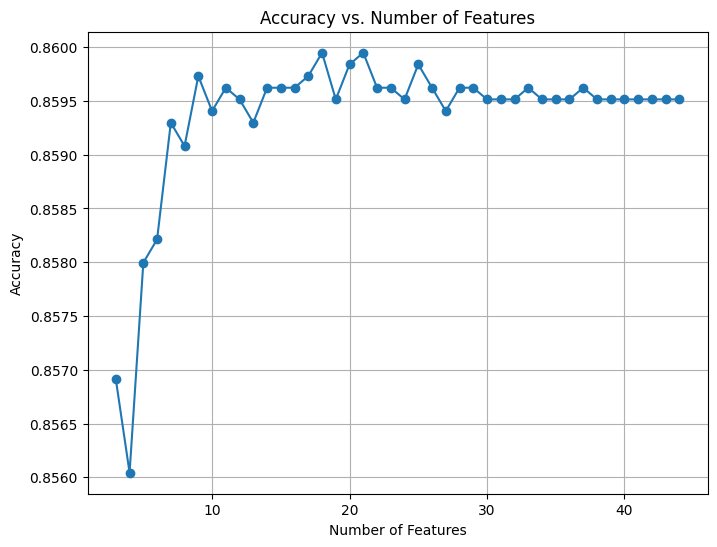

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(num_features_range, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
features_to_be_taken1=features[:pivot]
for i in features_to_be_taken1:
  print(i)

admission_type_id
number_inpatient
num_lab_procedures
number_diagnoses
medical_specialty
number_emergency
num_procedures
race
discharge_disposition_id
number_outpatient
max_glu_serum
A1Cresult
glimepiride
glipizide-metformin
admission_source_id
num_medications
time_in_hospital
repaglinide


In [ ]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.000000,0.000000,0.250000,0.090909,0.467391,0.2,0.441176,0.0,0.0,0.0,...,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000,0.250000,0.000000,0.543478,0.0,0.205882,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.285714,0.000000,0.041667,0.272727,0.750000,0.2,0.588235,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.285714,0.074074,0.125000,1.000000,0.347826,0.6,0.500000,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.142857,0.000000,0.125000,0.545455,0.663043,0.0,0.294118,0.0,0.0,0.0,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
set_columns=[i for i in features_to_be_taken1]+["readmitted"]
df=df[set_columns]

# Methodology

## Data Splitting

In [ ]:
X=df.drop('readmitted')
y=df['readmitted']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('readmitted', axis=1),
                                                    df['readmitted'],
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [ ]:
df

,admission_type_id,number_inpatient,num_lab_procedures,number_diagnoses,medical_specialty,number_emergency,num_procedures,race,discharge_disposition_id,number_outpatient,max_glu_serum,A1Cresult,glimepiride,glipizide-metformin,admission_source_id,num_medications,time_in_hospital,repaglinide,readmitted
0,0.000000,0.0,0.467391,0.454545,0.261538,0.0,0.2,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.441176,0.090909,0.333333,0.0
1,0.000000,0.0,0.543478,0.272727,0.261538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.205882,0.000000,0.333333,0.0
2,0.285714,0.0,0.750000,0.454545,0.261538,0.0,0.2,0.5,0.000000,0.0,0.666667,0.666667,0.666667,0.0,0.041667,0.588235,0.272727,0.333333,0.0
3,0.285714,0.0,0.347826,0.545455,0.261538,0.0,0.6,0.5,0.074074,0.0,0.666667,0.666667,0.333333,0.0,0.125000,0.500000,1.000000,0.333333,0.0
4,0.142857,0.0,0.663043,0.454545,0.261538,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.125000,0.294118,0.545455,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46085,0.285714,0.0,0.130435,0.545455,0.261538,0.0,0.2,1.0,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.117647,0.181818,0.333333,0.0
46086,0.000000,0.5,0.217391,0.636364,0.261538,0.0,0.2,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.441176,0.363636,0.333333,0.0
46087,0.000000,0.5,0.347826,0.636364,0.261538,0.0,0.6,0.0,0.111111,0.0,0.666667,0.666667,0.333333,0.0,0.166667,0.500000,0.363636,0.333333,0.0
46088,0.142857,0.5,0.478261,0.636364,0.876923,0.0,0.4,0.5,0.074074,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.588235,0.818182,0.333333,0.0


In [ ]:
x_train

,admission_type_id,number_inpatient,num_lab_procedures,number_diagnoses,medical_specialty,number_emergency,num_procedures,race,discharge_disposition_id,number_outpatient,max_glu_serum,A1Cresult,glimepiride,glipizide-metformin,admission_source_id,num_medications,time_in_hospital,repaglinide
3733,0.142857,0.0,0.510870,0.454545,1.000000,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.176471,0.000000,0.333333
36876,0.000000,0.0,0.608696,0.636364,0.261538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.264706,0.272727,0.333333
12878,0.142857,0.0,0.500000,0.636364,0.661538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.125000,0.470588,0.636364,0.333333
17321,0.000000,0.0,0.500000,0.272727,0.046154,0.0,0.6,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.208333,0.470588,0.181818,0.333333
39731,0.142857,0.0,0.554348,0.636364,0.261538,0.0,1.0,0.5,0.074074,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.676471,0.272727,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.285714,0.0,0.467391,0.000000,0.261538,0.0,0.6,0.5,0.185185,0.0,0.666667,0.666667,0.666667,0.0,0.000000,0.441176,0.272727,0.333333
45891,0.000000,0.5,0.630435,0.636364,0.261538,0.0,0.0,0.5,0.074074,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.294118,0.454545,0.333333
42613,0.000000,0.0,0.554348,0.636364,0.261538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.000000,0.333333,0.0,0.250000,0.470588,0.727273,0.333333
43567,0.000000,0.0,0.000000,0.363636,0.261538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.117647,0.000000,0.333333


In [ ]:
y_train

3733     0.0
36876    0.0
12878    0.0
17321    0.0
39731    0.0
        ... 
21243    0.0
45891    0.0
42613    0.0
43567    0.0
2732     0.0
Name: readmitted, Length: 36872, dtype: float64

## Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

Before SMOTE: 
1 :  5167
0 :  31705


In [ ]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [ ]:
x_train1

,admission_type_id,number_inpatient,num_lab_procedures,number_diagnoses,medical_specialty,number_emergency,num_procedures,race,discharge_disposition_id,number_outpatient,max_glu_serum,A1Cresult,glimepiride,glipizide-metformin,admission_source_id,num_medications,time_in_hospital,repaglinide
0,0.142857,0.0,0.510870,0.454545,1.000000,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.176471,0.000000,0.333333
1,0.000000,0.0,0.608696,0.636364,0.261538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.264706,0.272727,0.333333
2,0.142857,0.0,0.500000,0.636364,0.661538,0.0,0.0,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.125000,0.470588,0.636364,0.333333
3,0.000000,0.0,0.500000,0.272727,0.046154,0.0,0.6,0.5,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.208333,0.470588,0.181818,0.333333
4,0.142857,0.0,0.554348,0.636364,0.261538,0.0,1.0,0.5,0.074074,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.676471,0.272727,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63405,0.621054,0.0,0.643706,0.573204,0.261538,0.0,0.4,0.5,0.064329,0.0,0.666667,0.666667,0.333333,0.0,0.000000,0.667493,0.458376,0.333333
63406,0.000000,0.0,0.429764,0.379949,0.261538,0.0,0.0,0.5,0.026584,0.0,0.666667,0.666667,0.333333,0.0,0.235046,0.505278,0.636364,0.333333
63407,0.714286,1.0,0.446555,0.352280,0.588449,0.0,0.0,0.5,0.054017,0.0,0.666667,0.666667,0.333333,0.0,0.666667,0.328435,0.026518,0.430565
63408,0.000000,0.0,0.575582,0.416188,0.261538,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,0.333333,0.0,0.250000,0.256888,0.545455,0.333333


In [ ]:
y_train1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
63405    1.0
63406    1.0
63407    1.0
63408    1.0
63409    1.0
Name: readmitted, Length: 63410, dtype: float64

In [ ]:
print("After SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train1:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

After SMOTE: 
1 :  31705
0 :  31705


In [ ]:
print(x_train1.shape,x_test.shape,X.shape)
print(y_train1.shape,y_test.shape,y.shape)

(63410, 18) (9218, 18) (46090, 44)
(63410,) (9218,) (46090,)


# Models

## Logistic Regression

In [ ]:
parameters = {'penalty':['l2'], 'C':[1.0, 10.0, 100.0, 1000.0],'fit_intercept':[True,False]}
model = LogisticRegression(max_iter=3000)
clf = GridSearchCV(model, parameters)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)

Best params for LR: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}


              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77      7940
         1.0       0.21      0.54      0.30      1278

    accuracy                           0.65      9218
   macro avg       0.56      0.61      0.53      9218
weighted avg       0.81      0.65      0.70      9218



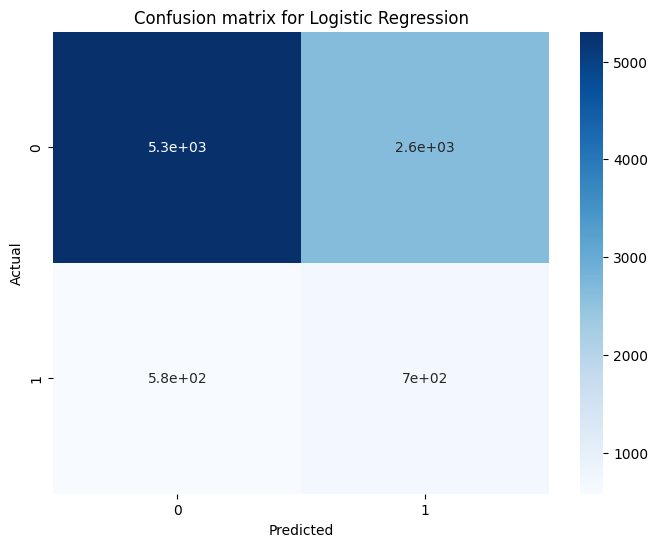

In [ ]:
predict = clf.predict(x_test)
print(classification_report(y_test, predict))
cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth': [5, 6, 7, 8, 9, None],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier()

# Set verbose to a positive integer value to print progress messages
clf = GridSearchCV(model, param_grid, verbose=2)
clf.fit(x_train1, y_train1)

dt_best_param = clf.best_params_
print("Best params for DT:", dt_best_param)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ccp_alpha=0.1, cri

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.84      7940
         1.0       0.23      0.35      0.28      1278

    accuracy                           0.74      9218
   macro avg       0.56      0.58      0.56      9218
weighted avg       0.79      0.74      0.77      9218



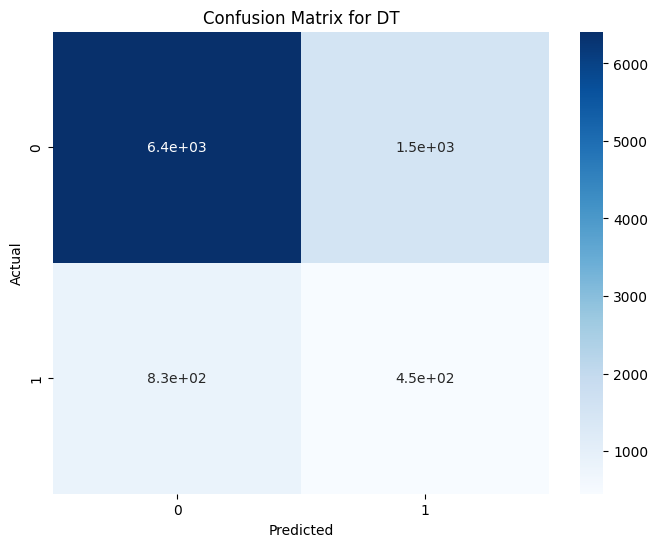

In [ ]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DT')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [20,60,80,100,120,150,180,200],
    'max_depth' : [4,5,6,7,8,9,10,None],
    'criterion' :['gini','entropy']
}

model = RandomForestClassifier()

# Set verbose to a positive integer value to print progress messages
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(x_train1, y_train1)

rf_best_param = clf.best_params_
print("Best params for RF:", rf_best_param)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.4s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.4s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.0s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.0s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.1s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.1s
[CV] END .......criterion=gini, max_depth=4, n_estimators=80; total time=   1.6s
[CV] END .......criterion=gini, max_depth=4, n

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      7940
         1.0       0.32      0.11      0.16      1278

    accuracy                           0.85      9218
   macro avg       0.60      0.54      0.54      9218
weighted avg       0.79      0.85      0.81      9218



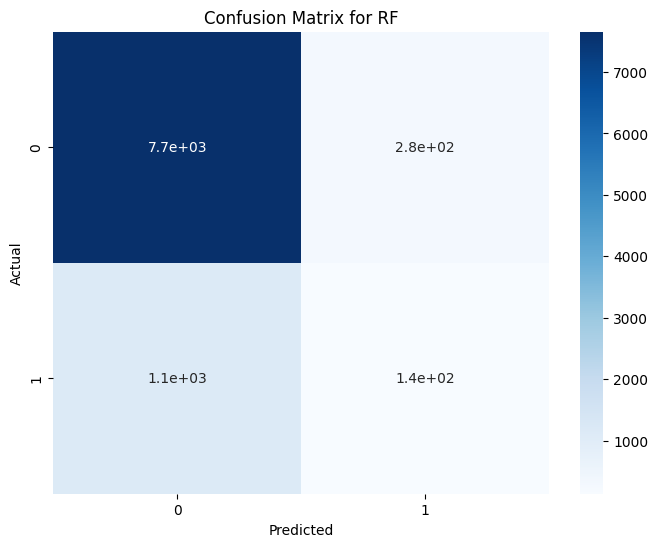

In [ ]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF')
plt.show()

## XGBoost Classifier

In [ ]:
import xgboost as xgb

param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.01, 0.001]}

model = xgb.XGBClassifier()
clf = GridSearchCV(model, param_grid, cv=5, verbose=2)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for XGBoost:", logreg_best_param)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   3.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

              precision    recall  f1-score   support

         0.0       0.60      0.16      0.25      2226
         1.0       0.85      0.98      0.91     11019

    accuracy                           0.84     13245
   macro avg       0.73      0.57      0.58     13245
weighted avg       0.81      0.84      0.80     13245



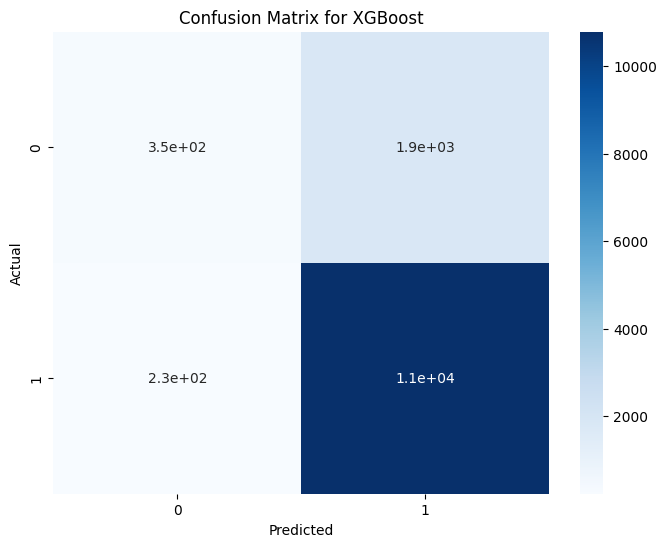

In [ ]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
max_i=-1
max_accuracy=-1
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    if acc>max_accuracy:
      max_i=i
      max_accuracy=acc

    scores.append(accuracy_score(y_test, y_pred))

Best params for KNN: {n_neighbors: 2}


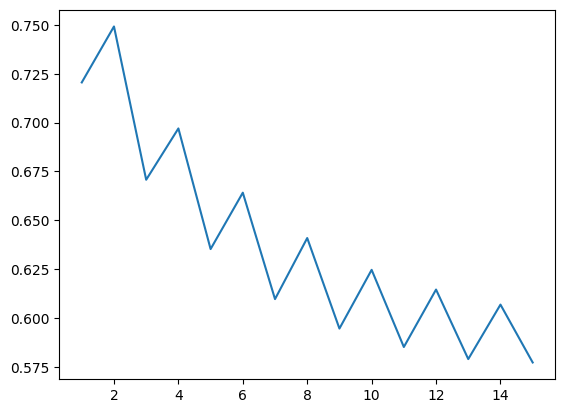

In [ ]:
import matplotlib.pyplot as plt
print("Best params for KNN: {n_neighbors: ", max_i,"}",sep="")
plt.plot(range(1,16),scores)

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      7940
         1.0       0.18      0.22      0.20      1278

    accuracy                           0.75      9218
   macro avg       0.52      0.53      0.52      9218
weighted avg       0.77      0.75      0.76      9218



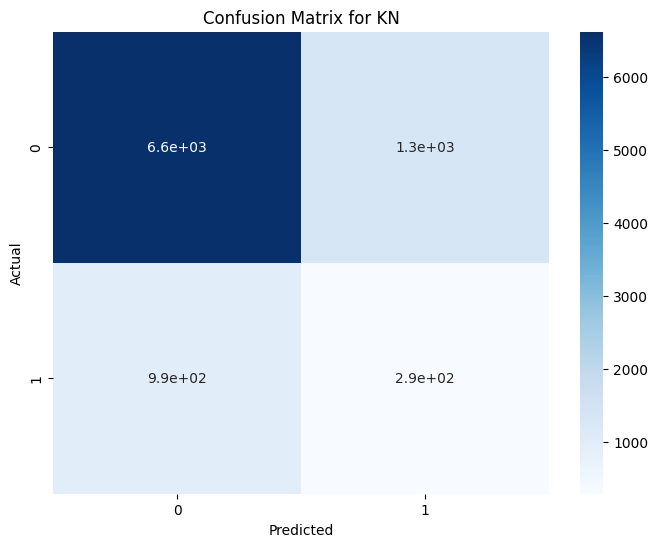

In [ ]:
knn = KNeighborsClassifier(n_neighbors=max_i)
knn.fit(x_train1,y_train1)
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KN')
plt.show()